# Hazelrigg Weather Data Processing
***by: Idhar Muhtar***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime


## Preparing Data

In [2]:
Hazelrigg_raw_data =  pd.read_csv('Hazelrigg Daily Obs 1966-(All data 1966-2025).csv', 
                                  encoding='ISO-8859-1')
display(Hazelrigg_raw_data.head(5))

C:\Users\Asus\AppData\Local\Temp\ipykernel_31008\1349893821.py:1: DtypeWarning: Columns (3,6,7,9,10,12,13,15,16,17,18,19,20,22,27,30,31,32,61) have mixed types. Specify dtype option on import or set low_memory=False.
  Hazelrigg_raw_data =  pd.read_csv('Hazelrigg Daily Obs 1966-(All data 1966-2025).csv',


,YEAR,MONTH,DAY,TOTAL CLOUD,WIND DIR,WIND SPEED,PRESENT WEATHER,VISIBLITY,DRY BULB,WET BULB,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,1966,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1966,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1966,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1966,10,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1966,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Processing

In [3]:
#Extract date into year, month,and day
Hazelrigg_raw_data['date'] = pd.to_datetime(dict(year=Hazelrigg_raw_data.YEAR, month=Hazelrigg_raw_data.MONTH, 
day=Hazelrigg_raw_data.DAY))
Hazelrigg_raw_data.head()

,YEAR,MONTH,DAY,TOTAL CLOUD,WIND DIR,WIND SPEED,PRESENT WEATHER,VISIBLITY,DRY BULB,WET BULB,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,date
0,1966,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-01
1,1966,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-02
2,1966,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-03
3,1966,10,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-04
4,1966,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-05


In [22]:
## Create a copy for data cleaning
Hazelrigg_cleaned_data = Hazelrigg_raw_data.copy()
Hazelrigg_cleaned_data.head()

,YEAR,MONTH,DAY,TOTAL CLOUD,WIND DIR,WIND SPEED,PRESENT WEATHER,VISIBLITY,DRY BULB,WET BULB,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,date
0,1966,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-01
1,1966,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-02
2,1966,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-03
3,1966,10,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-04
4,1966,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966-10-05


In [5]:
#drop Unnamed Columns
Hazelrigg_cleaned_data = Hazelrigg_cleaned_data.drop(
    Hazelrigg_cleaned_data.columns[Hazelrigg_cleaned_data.columns.str.contains('Unnamed:', case=False)],
    axis=1
)


In [6]:
Hazelrigg_cleaned_data.head()

,YEAR,MONTH,DAY,TOTAL CLOUD,WIND DIR,WIND SPEED,PRESENT WEATHER,VISIBLITY,DRY BULB,WET BULB,...,SOG WITH SNOW,SNOW DEPTH CM,RAIN,RUN OF WIND,SUNSHINE,SNOW,HAIL,THUNDER,GALE,date
0,1966,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,9.3,42.0,0.2,NaN,NaN,NaN,NaN,1966-10-01
1,1966,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1.7,35.0,5.8,NaN,NaN,NaN,NaN,1966-10-02
2,1966,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,19.8,90.0,1.7,NaN,NaN,NaN,NaN,1966-10-03
3,1966,10,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,6.8,151.0,0.0,NaN,NaN,NaN,NaN,1966-10-04
4,1966,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0.7,156.0,0.1,NaN,NaN,NaN,NaN,1966-10-05


In [7]:
#Drop Data Where Year = 1996
Hazelrigg_cleaned_data.drop(Hazelrigg_cleaned_data.loc[Hazelrigg_cleaned_data['YEAR']==1966].index,inplace=True)

In [8]:
#Convert object data type to numeric
columns = Hazelrigg_cleaned_data.columns.tolist()
for column in columns:
    Hazelrigg_cleaned_data[column] = pd.to_numeric(Hazelrigg_cleaned_data[column], errors='coerce')

### Data Visualization

In [10]:
#Define column to plot
Year = Hazelrigg_cleaned_data['YEAR']
Min_temp = Hazelrigg_cleaned_data['MIN']
Max_temp = Hazelrigg_cleaned_data['MAX']
Cloud = Hazelrigg_cleaned_data['TOTAL CLOUD']
Rain = Hazelrigg_cleaned_data['RAIN']
Sunshine = Hazelrigg_cleaned_data['SUNSHINE']
Snow = Hazelrigg_cleaned_data['SNOW']

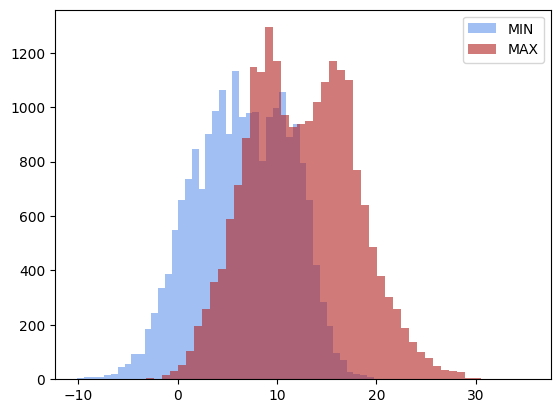

In [23]:
#Historgram plot to compare Min and Max temperature
plt.hist(Min_temp, bins=50, color='cornflowerblue', alpha=0.6, label="MIN")
plt.hist(Max_temp, bins=50, color='firebrick', alpha=0.6, label="MAX")
plt.legend()

In [24]:
#Find Mininum & Maximum Year to determine x axis limit
print(Hazelrigg_cleaned_data['YEAR'].min())
print(Hazelrigg_cleaned_data['YEAR'].max())

1966
2024


(1967.0, 2024.0)

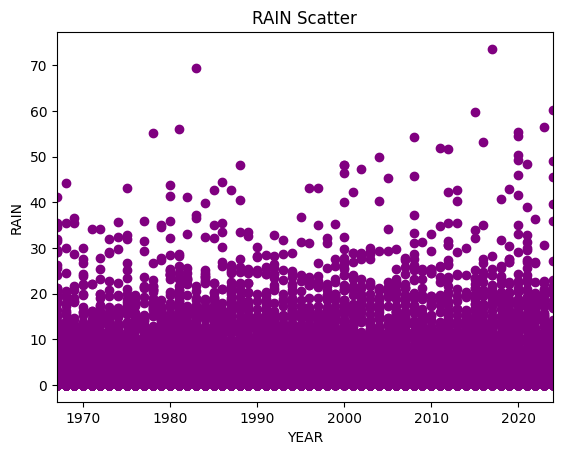

In [13]:
#Rain scatter based on Year
plt.scatter(Year,Rain, color='purple', marker='o')

# Add title and labels
plt.title('RAIN Scatter')
plt.xlabel('YEAR')
plt.ylabel('RAIN')
plt.xlim(1967, 2024)

### Grouping data by year for a stack plot.

In [14]:
yearly_avg = Hazelrigg_cleaned_data.groupby("YEAR").mean().reset_index()

In [15]:
#Define column to plot
Year_group = yearly_avg['YEAR']
Min_temp_group = yearly_avg['MIN']
Max_temp_group = yearly_avg['MAX']
Cloud_group = yearly_avg['TOTAL CLOUD']
Rain_group = yearly_avg['RAIN']
Sunshine_group = yearly_avg['SUNSHINE']
Snow_group = yearly_avg['SNOW']

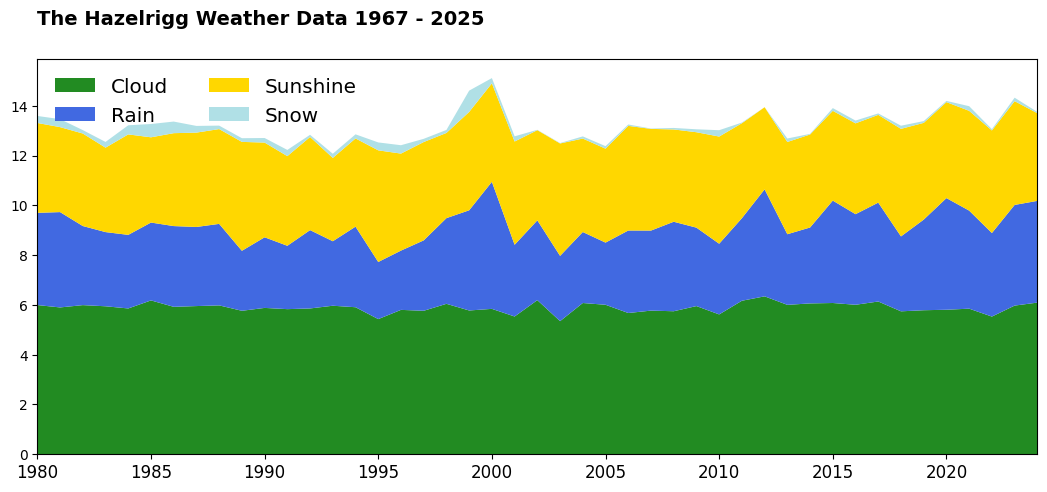

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

colour_list = ['forestgreen', 'royalblue', 'gold', 'powderblue']
label_list = ['Cloud', 'Rain', 'Sunshine', 'Snow']


#Main Title

plt.title("The Hazelrigg Weather Data 1967 - 2025",  
    fontsize=14,
    fontweight="bold",  
    x=0.0,
    ha="left",
    pad=25
)
# Adjust margins
fig.subplots_adjust(
    left=0,
    right=1,
    top=0.9
)

# Plot the stackplot
ax.stackplot(Year_group.values,
             Cloud_group, Rain_group, Sunshine_group, Snow_group,
             colors=colour_list,
             labels=label_list)

# Set tick params
ax.xaxis.set_tick_params(labelsize='large')  

# Add legend
plt.legend(loc='upper left', frameon=False, fontsize='x-large', ncol=2)

# Set x-axis limits
plt.xlim(1980, 2024)

#Save figure
fig.savefig('The Hazelrigg Weather Data Stackplot.png', bbox_inches='tight', pad_inches=0.3, dpi=300)
plt.show()